In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.metrics import *
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.svm import SVC
import pandas as pd
from matplotlib.patches import Patch
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import (
    KFold,
    ShuffleSplit,
    StratifiedKFold,
    StratifiedShuffleSplit,
    TimeSeriesSplit)

import warnings
warnings.filterwarnings("ignore")

In [18]:
df = pd.read_csv('mobile_price.csv')

print("Head:")
display(df.head())
print("Shape:", df.shape)

Head:


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


Shape: (2000, 21)


In [19]:
X = df.drop('price_range', axis=1)
y = df['price_range']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Size X_train:", X_train.shape)
print("Size X_test :", X_test.shape)

Size X_train: (1600, 20)
Size X_test : (400, 20)


In [24]:
rf_base = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

rf_base.fit(X_train, y_train)
y_pred_base = rf_base.predict(X_test)

print("Accuracy test:", accuracy_score(y_test, y_pred_base))
print()


Accuracy test: 0.88



In [25]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(
    rf_base,
    X_train,
    y_train,
    cv=cv,
    scoring='accuracy',
    n_jobs=-1
)

print("Scores por fold:", cv_scores)
print("Mean accuracy   :", cv_scores.mean())
print("Std             :", cv_scores.std())
print()


Scores por fold: [0.865625 0.8625   0.803125 0.875    0.9     ]
Mean accuracy   : 0.8612500000000001
Std             : 0.03190562254525056



In [28]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestClassifier(random_state=42, n_jobs=-1)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=cv,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)


print("Best parameters:", grid_search.best_params_)
print("Best score (CV)  :", grid_search.best_score_)
print()


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters: {'max_depth': 15, 'max_features': 'sqrt', 'n_estimators': 200}
Best score (CV)  : 0.8731250000000002



Accuracy test: 0.8925

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.96       100
           1       0.85      0.83      0.84       100
           2       0.84      0.82      0.83       100
           3       0.95      0.94      0.94       100

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.89      0.89      0.89       400



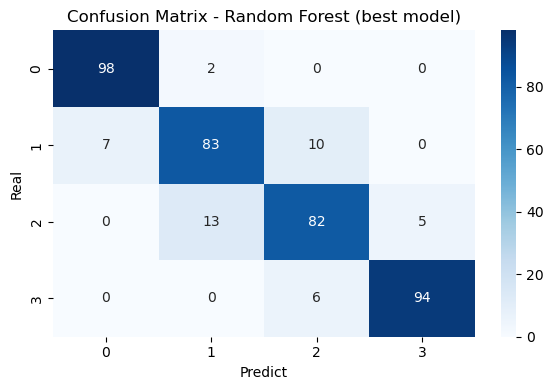

In [29]:
best_model = grid_search.best_estimator_

y_pred_best = best_model.predict(X_test)

print("Accuracy test:", accuracy_score(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))

cm = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predict")
plt.ylabel("Real")
plt.title("Confusion Matrix - Random Forest (best model)")
plt.tight_layout()
plt.show()